In [45]:
# Import Packages and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Import Data
data = pd.read_csv("./SAMPLE.csv", encoding = "cp949")
data.shape
data.head()

NUMBER name gender  age   address      phone_num           email  funnel  \
0       1  OOO      F   31   강원도 홍천군  010-****-****  ****@gmail.com  Direct   
1       2  OOO      M   48  충청남도 공주시  010-****-****  ****@gmail.com  Direct   
2       3  OOO      M   41   강원도 인제군  010-****-****  ****@gmail.com    Paid   
3       4  OOO      M   40   강원도 철원군  010-****-****  ****@gmail.com    Paid   
4       5  OOO      M   22  경기도 동두천시  010-****-****  ****@gmail.com    Paid   

    cart_date buy_yn    buy_date    Goods  
0  2022-08-22      Y  2022-08-30     bike  
1  2022-05-09      Y  2022-05-15  T-shirt  
2  2022-08-09      Y  2022-09-26   bottle  
3  2022-01-06      Y  2022-11-11     bike  
4  2022-11-18      Y  2022-12-20   bottle

# Preprocess Data
### Get To Know Data

In [47]:
# Identify Missing Data and Data Types in Dataset
data.info(show_counts=True)
data.isna().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NUMBER     1000 non-null   int64 
 1   name       1000 non-null   object
 2   gender     1000 non-null   object
 3   age        1000 non-null   int64 
 4   address    1000 non-null   object
 5   phone_num  1000 non-null   object
 6   email      1000 non-null   object
 7   funnel     1000 non-null   object
 8   cart_date  1000 non-null   object
 9   buy_yn     1000 non-null   object
 10  buy_date   959 non-null    object
 11  Goods      959 non-null    object
dtypes: int64(2), object(10)
memory usage: 93.9+ KB


NUMBER          age
count  1000.000000  1000.000000
mean    500.500000    41.698000
std     288.819436    13.863224
min       1.000000    18.000000
25%     250.750000    30.000000
50%     500.500000    42.000000
75%     750.250000    54.000000
max    1000.000000    65.000000

# Preprocessing Dataset
### Remove Columns(Attributes) Leaving Only Necessary Columns

In [48]:
# Remove All, Leaving the Necessary Columns(Attributes) of the Data
# Identify Columns in Data
columns = data.columns
columns

Index(['NUMBER', 'name', 'gender', 'age', 'address', 'phone_num', 'email',
       'funnel', 'cart_date', 'buy_yn', 'buy_date', 'Goods'],
      dtype='object')

In [49]:
# Clear Unnecessary Columns
data.drop(['NUMBER', 'name', 'phone_num', 'email'], axis = 1, inplace = True)
data

gender  age   address  funnel   cart_date buy_yn    buy_date    Goods
0        F   31   강원도 홍천군  Direct  2022-08-22      Y  2022-08-30     bike
1        M   48  충청남도 공주시  Direct  2022-05-09      Y  2022-05-15  T-shirt
2        M   41   강원도 인제군    Paid  2022-08-09      Y  2022-09-26   bottle
3        M   40   강원도 철원군    Paid  2022-01-06      Y  2022-11-11     bike
4        M   22  경기도 동두천시    Paid  2022-11-18      Y  2022-12-20   bottle
..     ...  ...       ...     ...         ...    ...         ...      ...
995      F   64  충청남도 공주시   Cross  2022-02-16      Y  2022-09-16  T-shirt
996      M   48     부산광역시  Direct  2022-12-28      Y  2022-12-29      pen
997      M   37  경상남도 창녕군   Cross  2022-10-08      Y  2022-10-14      pen
998      M   22  전라북도 익산시   Cross  2022-02-09      Y  2022-07-19  T-shirt
999      F   33   강원도 평창군   Cross  2022-10-04      Y  2022-12-08  sticker

[1000 rows x 8 columns]

In [50]:
data.isna().sum()

gender        0
age           0
address       0
funnel        0
cart_date     0
buy_yn        0
buy_date     41
Goods        41
dtype: int64

# Preprocessing Dataset
### Convert a Date Character Type to a Date Type
### Visualize cart_date and buy_date as a Time Series Graph

In [51]:
data[data['cart_date'] == "None"]

gender  age   address   funnel cart_date buy_yn buy_date Goods
70       M   64  전라북도 군산시   Direct      None      N      NaN   NaN
78       F   25   경기도 부천시  Organic      None      N      NaN   NaN
114      F   25   경기도 이천시    Cross      None      N      NaN   NaN
130      F   62   경기도 여주시  Organic      None      N      NaN   NaN
138      F   18     인천광역시     Paid      None      N      NaN   NaN
143      M   47   강원도 양양군   Direct      None      N      NaN   NaN
161      F   65   경기도 포천시    Cross      None      N      NaN   NaN
186      M   34  전라남도 신안군    Cross      None      N      NaN   NaN
211      F   65     대전광역시  Organic      None      N      NaN   NaN
214      F   54   경기도 양주시     Paid      None      N      NaN   NaN
241      M   52  전라남도 구례군     Paid      None      N      NaN   NaN
252      F   18  충청북도 보은군  Organic      None      N      NaN   NaN
273      M   36  충청북도 진천군     Paid      None      N      NaN   NaN
301      F   34  전라남도 장흥군    Cross      None      N      NaN   NaN
313      F   65   강원도 영월군    Cross      None      N      NaN   NaN
314      F   32  충청북도 괴산군     Paid      None      N      NaN   NaN
348      M   37  전라남도 목포시  Organic      None      N      NaN   NaN
378      F   54  경상북도 울릉군     Paid      None      N      NaN   NaN
438      F   36   강원도 횡성군     Paid      None      N      NaN   NaN
469      M   32   강원도 인제군   Direct      None      N      NaN   NaN
518      M   33  전라남도 고흥군   Direct      None      N      NaN   NaN
522      F   49   강원도 춘천시    Cross      None      N      NaN   NaN
562      M   57  경상남도 밀양시     Paid      None      N      NaN   NaN
603      M   60   경기도 안산시   Direct      None      N      NaN   NaN
648      F   56   경기도 김포시   Direct      None      N      NaN   NaN
669      F   28   경기도 파주시     Paid      None      N      NaN   NaN
680      M   26  충청북도 음성군    Cross      None      N      NaN   NaN
702      F   62  경상남도 고성군    Cross      None      N      NaN   NaN
726      F   33   강원도 동해시   Direct      None      N      NaN   NaN
738      F   65  경상남도 거창군  Organic      None      N      NaN   NaN
743      F   51  경상북도 문경시     Paid      None      N      NaN   NaN
777      M   27   강원도 강릉시   Direct      None      N      NaN   NaN
792      M   24  전라남도 여수시  Organic      None      N      NaN   NaN
802      M   63   강원도 정선군    Cross      None      N      NaN   NaN
836      M   55  경상남도 거제시     Paid      None      N      NaN   NaN
879      M   58  전라남도 화순군     Paid      None      N      NaN   NaN
887      F   40   강원도 화천군     Paid      None      N      NaN   NaN
894      F   58  경상남도 거제시   Direct      None      N      NaN   NaN
915      F   54  경상남도 창녕군     Paid      None      N      NaN   NaN
935      F   33  경상북도 김천시  Organic      None      N      NaN   NaN
978      F   51   경기도 화성시   Direct      None      N      NaN   NaN

In [ ]:
# Replace with NaN if No Records Have Been Added to the Cart
data['cart_date'] = data['cart_date'].replace('None', np.nan)
data

gender  age   address  funnel   cart_date buy_yn    buy_date    Goods
0        F   31   강원도 홍천군  Direct  2022-08-22      Y  2022-08-30     bike
1        M   48  충청남도 공주시  Direct  2022-05-09      Y  2022-05-15  T-shirt
2        M   41   강원도 인제군    Paid  2022-08-09      Y  2022-09-26   bottle
3        M   40   강원도 철원군    Paid  2022-01-06      Y  2022-11-11     bike
4        M   22  경기도 동두천시    Paid  2022-11-18      Y  2022-12-20   bottle
..     ...  ...       ...     ...         ...    ...         ...      ...
995      F   64  충청남도 공주시   Cross  2022-02-16      Y  2022-09-16  T-shirt
996      M   48     부산광역시  Direct  2022-12-28      Y  2022-12-29      pen
997      M   37  경상남도 창녕군   Cross  2022-10-08      Y  2022-10-14      pen
998      M   22  전라북도 익산시   Cross  2022-02-09      Y  2022-07-19  T-shirt
999      F   33   강원도 평창군   Cross  2022-10-04      Y  2022-12-08  sticker

[1000 rows x 8 columns]

In [53]:
data[data['cart_date'].isna()]

gender  age   address   funnel cart_date buy_yn buy_date Goods
70       M   64  전라북도 군산시   Direct       NaN      N      NaN   NaN
78       F   25   경기도 부천시  Organic       NaN      N      NaN   NaN
114      F   25   경기도 이천시    Cross       NaN      N      NaN   NaN
130      F   62   경기도 여주시  Organic       NaN      N      NaN   NaN
138      F   18     인천광역시     Paid       NaN      N      NaN   NaN
143      M   47   강원도 양양군   Direct       NaN      N      NaN   NaN
161      F   65   경기도 포천시    Cross       NaN      N      NaN   NaN
186      M   34  전라남도 신안군    Cross       NaN      N      NaN   NaN
211      F   65     대전광역시  Organic       NaN      N      NaN   NaN
214      F   54   경기도 양주시     Paid       NaN      N      NaN   NaN
241      M   52  전라남도 구례군     Paid       NaN      N      NaN   NaN
252      F   18  충청북도 보은군  Organic       NaN      N      NaN   NaN
273      M   36  충청북도 진천군     Paid       NaN      N      NaN   NaN
301      F   34  전라남도 장흥군    Cross       NaN      N      NaN   NaN
313      F   65   강원도 영월군    Cross       NaN      N      NaN   NaN
314      F   32  충청북도 괴산군     Paid       NaN      N      NaN   NaN
348      M   37  전라남도 목포시  Organic       NaN      N      NaN   NaN
378      F   54  경상북도 울릉군     Paid       NaN      N      NaN   NaN
438      F   36   강원도 횡성군     Paid       NaN      N      NaN   NaN
469      M   32   강원도 인제군   Direct       NaN      N      NaN   NaN
518      M   33  전라남도 고흥군   Direct       NaN      N      NaN   NaN
522      F   49   강원도 춘천시    Cross       NaN      N      NaN   NaN
562      M   57  경상남도 밀양시     Paid       NaN      N      NaN   NaN
603      M   60   경기도 안산시   Direct       NaN      N      NaN   NaN
648      F   56   경기도 김포시   Direct       NaN      N      NaN   NaN
669      F   28   경기도 파주시     Paid       NaN      N      NaN   NaN
680      M   26  충청북도 음성군    Cross       NaN      N      NaN   NaN
702      F   62  경상남도 고성군    Cross       NaN      N      NaN   NaN
726      F   33   강원도 동해시   Direct       NaN      N      NaN   NaN
738      F   65  경상남도 거창군  Organic       NaN      N      NaN   NaN
743      F   51  경상북도 문경시     Paid       NaN      N      NaN   NaN
777      M   27   강원도 강릉시   Direct       NaN      N      NaN   NaN
792      M   24  전라남도 여수시  Organic       NaN      N      NaN   NaN
802      M   63   강원도 정선군    Cross       NaN      N      NaN   NaN
836      M   55  경상남도 거제시     Paid       NaN      N      NaN   NaN
879      M   58  전라남도 화순군     Paid       NaN      N      NaN   NaN
887      F   40   강원도 화천군     Paid       NaN      N      NaN   NaN
894      F   58  경상남도 거제시   Direct       NaN      N      NaN   NaN
915      F   54  경상남도 창녕군     Paid       NaN      N      NaN   NaN
935      F   33  경상북도 김천시  Organic       NaN      N      NaN   NaN
978      F   51   경기도 화성시   Direct       NaN      N      NaN   NaN

In [54]:
# Convert cart_date and buy_date Types to Date Types
data['cart_date'] = pd.to_datetime(data['cart_date'], format="%Y-%m-%d")
data['buy_date'] = pd.to_datetime(data['buy_date'], format="%Y-%m-%d")

In [55]:
# See the First and Last Records of cart_date and buy_date
print(data[['cart_date']].min())
print(data[['cart_date']].max())

print(data[['buy_date']].min())
print(data[['buy_date']].max())

cart_date   2022-01-01
dtype: datetime64[ns]
cart_date   2022-12-31
dtype: datetime64[ns]
buy_date   2022-01-22
dtype: datetime64[ns]
buy_date   2022-12-31
dtype: datetime64[ns]


In [56]:
# Visualize cart_date and buy_date as a Time Series Graph
# Replicate the DataFrame to Preserve Original Data
data_copy = pd.DataFrame(data.copy())
data_copy

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle
..     ...  ...       ...     ...        ...    ...        ...      ...
995      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt
996      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen
997      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen
998      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt
999      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker

[1000 rows x 8 columns]

In [57]:
# Visualize cart_date as a Time Series Graph
# Save the Number of Add to Cart on Each Date
daily_counts = data_copy['cart_date'].value_counts()

In [58]:
# Representing Cart Counts as a DataFrame
daily_count_df = pd.DataFrame({'cart_date': daily_counts.index, 'count': daily_counts.values})
daily_count_df

cart_date  count
0   2022-08-15      8
1   2022-07-29      7
2   2022-01-13      7
3   2022-04-10      6
4   2022-02-07      6
..         ...    ...
334 2022-09-29      1
335 2022-05-12      1
336 2022-05-16      1
337 2022-09-10      1
338 2022-10-04      1

[339 rows x 2 columns]

In [59]:
# Sort on the cart_date Column, Then Initialize the Index
daily_count_df.sort_values(by = 'cart_date', inplace = True)
daily_count_df.reset_index(drop = True, inplace = True)
daily_count_df

cart_date  count
0   2022-01-01      1
1   2022-01-02      3
2   2022-01-03      4
3   2022-01-04      3
4   2022-01-06      4
..         ...    ...
334 2022-12-27      3
335 2022-12-28      2
336 2022-12-29      4
337 2022-12-30      3
338 2022-12-31      5

[339 rows x 2 columns]

In [60]:
# Check the Data Type of cart_date to Create a Time Series Graph
# If the Data Type of cart_date is not Date, Use to_datetime to Convert It to Date Type
daily_count_df['cart_date'].dtype

dtype('<M8[ns]')

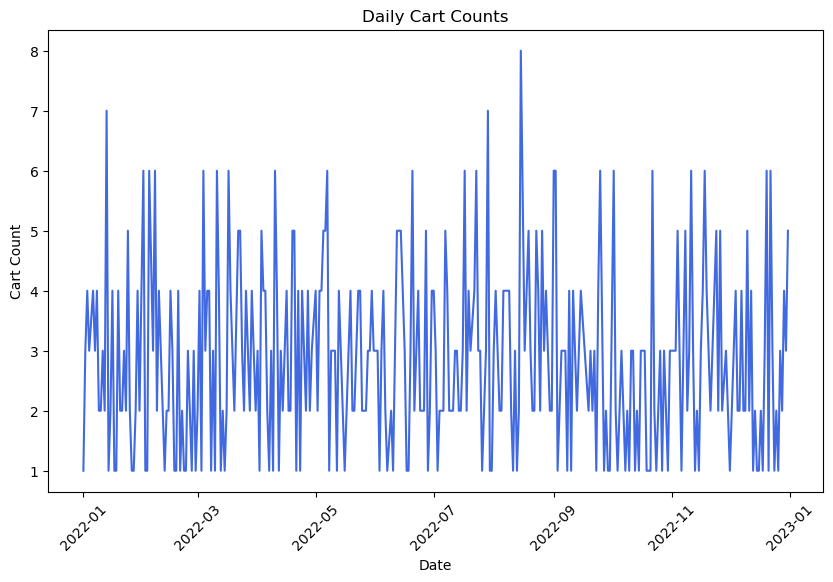

In [61]:
# Plot the Number of Customers in the Cart by DAte as a Time Series Graph
plt.figure(figsize=(10, 6))
plt.plot(daily_count_df['cart_date'], daily_count_df['count'], color='royalblue')

plt.title('Daily Cart Counts')
plt.xlabel('Date')
plt.ylabel('Cart Count')
plt.xticks(rotation=45)

plt.show()

In [62]:
# buy_date 시계열 그래프로 확인하기
# 각 날짜에 고객이 구매한 횟수 저장하기
daily_counts = data_copy['buy_date'].value_counts()
daily_counts

2022-12-31    21
2022-12-29    20
2022-11-27    14
2022-12-26    13
2022-12-19    13
              ..
2022-05-01     1
2022-03-09     1
2022-09-13     1
2022-03-11     1
2022-06-07     1
Name: buy_date, Length: 271, dtype: int64

In [63]:
# 구매한 횟수 데이터 프레임으로 나타내기
daily_count_df = pd.DataFrame({'buy_date': daily_counts.index, 'count': daily_counts.values})

In [64]:
# buy_date 열을 기준으로 정렬한 후, 인덱스 초기화하기
daily_count_df.sort_values(by = 'buy_date', inplace = True)
daily_count_df.reset_index(drop = True, inplace = True)
daily_count_df

buy_date  count
0   2022-01-22      1
1   2022-01-24      1
2   2022-01-26      1
3   2022-01-30      1
4   2022-01-31      1
..         ...    ...
266 2022-12-27     11
267 2022-12-28      9
268 2022-12-29     20
269 2022-12-30     12
270 2022-12-31     21

[271 rows x 2 columns]

In [65]:
# 시계열 그래프 작성을 위한 buy_date 데이터 타입 확인
# buy_date 데이터 타입이 date가 아닌 경우 to_datetime을 활용하여 date 타입으로 형변환
daily_count_df['buy_date'].dtype

dtype('<M8[ns]')

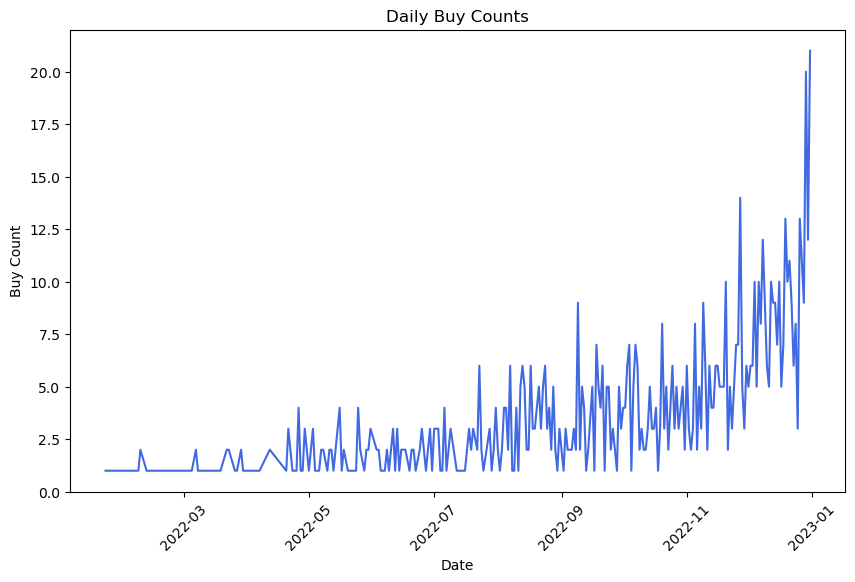

In [66]:
# 날짜별로 구매한 고객의 수 시계열 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(daily_count_df['buy_date'], daily_count_df['count'], color='royalblue')

plt.title('Daily Buy Counts')
plt.xlabel('Date')
plt.ylabel('Buy Count')
plt.xticks(rotation=45)

plt.show()

# 데이터 전처리하기
### 장바구니 담기부터 구매까지 걸린 시간 분석하기

In [67]:
# 원본 데이터 보존을 위한 데이터 프레임 복제
data_diff = pd.DataFrame(data.copy())
data_diff

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle
..     ...  ...       ...     ...        ...    ...        ...      ...
995      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt
996      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen
997      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen
998      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt
999      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker

[1000 rows x 8 columns]

In [68]:
# 장바구니 담기부터 구매까지 걸린 시간(일) 구하기
data_diff['date_diff'] = (data['buy_date'] - data['cart_date']).dt.days
data_diff

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
995      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
996      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
997      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
998      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
999      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0          8.0  
1          6.0  
2         48.0  
3        309.0  
4         32.0  
..         ...  
995      212.0  
996        1.0  
997        6.0  
998      160.0  
999       65.0  

[1000 rows x 9 columns]

In [69]:
# date_diff 값의 개수 확인해보기
data_diff['date_diff'].value_counts()

0.0      22
2.0      15
5.0      14
1.0      14
15.0     13
         ..
295.0     1
228.0     1
246.0     1
258.0     1
160.0     1
Name: date_diff, Length: 269, dtype: int64

In [70]:
# date_diff 자료형 정수형으로 바꾸기
data_diff['date_diff'].fillna(-1, inplace=True)
data_diff['date_diff'] = data_diff['date_diff'].astype(int)

In [71]:
# date_diff 값의 개수 확인해보기
data_diff['date_diff'].value_counts()

-1      41
 0      22
 2      15
 1      14
 5      14
        ..
 295     1
 228     1
 246     1
 258     1
 160     1
Name: date_diff, Length: 270, dtype: int64

In [72]:
# 결측치를 -1로 바꿨을 때와 제거했을 때 비교해보기
data_diff2 = pd.DataFrame(data.copy())
data_diff2['date_diff'] = (data['buy_date'] - data['cart_date']).dt.days

data_diff2 = data_diff2.dropna(subset=['date_diff'])
data_diff2['date_diff'] = data_diff2['date_diff'].astype(int)
data_diff2['date_diff'].value_counts()

0      22
2      15
5      14
1      14
15     13
       ..
295     1
228     1
246     1
258     1
160     1
Name: date_diff, Length: 269, dtype: int64

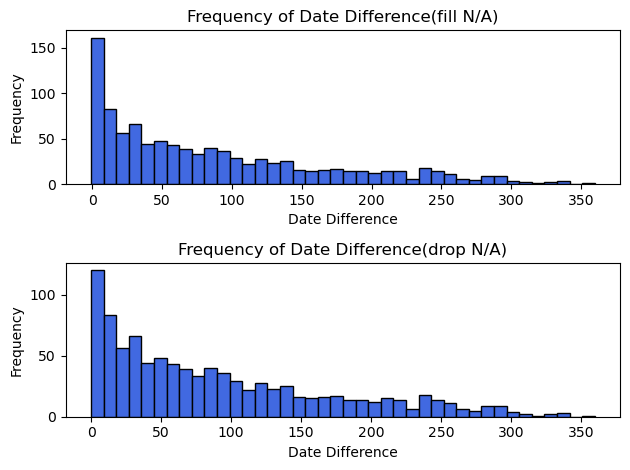

In [73]:
# 그래프로 시각화하기
plt.subplot(2, 1, 1)
plt.hist(data_diff['date_diff'], bins=40, color='royalblue', edgecolor='black')
plt.xlabel('Date Difference')
plt.ylabel('Frequency')
plt.title('Frequency of Date Difference(fill N/A)')

plt.subplot(2, 1, 2)
plt.hist(data_diff2['date_diff'], bins=40, color='royalblue', edgecolor='black')
plt.xlabel('Date Difference')
plt.ylabel('Frequency')
plt.title('Frequency of Date Difference(drop N/A)')

plt.tight_layout() 
plt.show()

# 데이터 전처리하기
### 장바구니 담기부터 구매까지 걸린 시간 분석하기
### 이상치 제거하기

In [74]:
# data에 'date_diff' 반영하기
data['date_diff'] = data_diff['date_diff']
data

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
995      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
996      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
997      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
998      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
999      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
995        212  
996          1  
997          6  
998        160  
999         65  

[1000 rows x 9 columns]

In [75]:
# ‘date_diff’ 분석하기
data_diff2['date_diff'].describe()

count    959.000000
mean      90.770594
std       81.952450
min        0.000000
25%       23.000000
50%       67.000000
75%      138.000000
max      360.000000
Name: date_diff, dtype: float64

In [76]:
# 이상치 판별을 위한 IQR 계산
Q1 = data_diff2['date_diff'].quantile(0.25)
Q3 = data_diff2['date_diff'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 하한 및 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 찾기
outliers = data_diff2[(data_diff2['date_diff'] < lower_bound) | (data_diff2['date_diff'] > upper_bound)]
print(Q1, Q3, IQR, lower_bound, upper_bound)
outliers

23.0 138.0 115.0 -149.5 310.5


gender  age   address   funnel  cart_date buy_yn   buy_date     Goods  \
27       M   19  전라남도 완도군    Cross 2022-01-07      Y 2022-11-16  notebook   
141      M   46  충청남도 태안군   Direct 2022-02-16      Y 2022-12-31   sticker   
405      F   40  충청남도 청양군    Cross 2022-01-03      Y 2022-12-29  notebook   
530      F   52  전라남도 순천시  Organic 2022-01-14      Y 2022-12-16   sticker   
566      F   18  전라북도 임실군    Cross 2022-01-04      Y 2022-12-04    bottle   
693      F   61   강원도 고성군  Organic 2022-02-04      Y 2022-12-30  notebook   
701      M   65  경상북도 경산시    Cross 2022-01-02      Y 2022-12-08      bike   
758      F   54   경기도 시흥시    Cross 2022-01-03      Y 2022-12-01      bike   

     date_diff  
27         313  
141        318  
405        360  
530        336  
566        334  
693        329  
701        340  
758        332

In [77]:
# 이상치 삭제
data = data.drop(outliers.index).reset_index(drop=True)
data

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
987      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
988      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
989      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
990      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
991      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
987        212  
988          1  
989          6  
990        160  
991         65  

[992 rows x 9 columns]

In [78]:
# 결과 출력
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("이상치 제거 후 데이터프레임:")
data

Lower Bound: -149.5
Upper Bound: 310.5
이상치 제거 후 데이터프레임:


gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
987      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
988      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
989      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
990      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
991      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
987        212  
988          1  
989          6  
990        160  
991         65  

[992 rows x 9 columns]

In [79]:
data_outliers = data_diff2[(data_diff2['date_diff'] >= lower_bound) & (data_diff2['date_diff'] <= upper_bound)]
data_outliers = data_outliers.reset_index(drop=True)
data_outliers

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
946      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
947      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
948      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
949      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
950      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
946        212  
947          1  
948          6  
949        160  
950         65  

[951 rows x 9 columns]

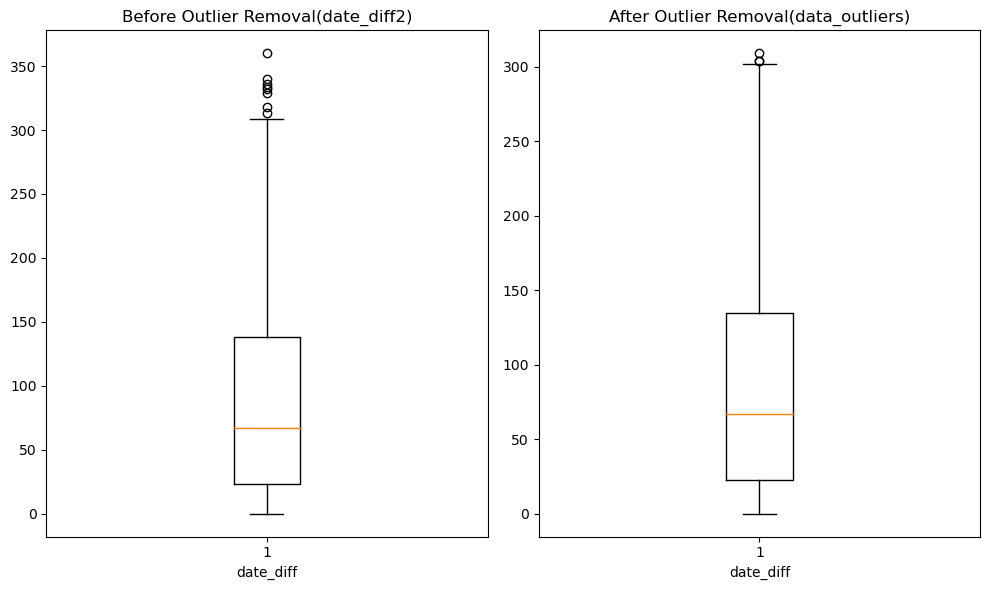

In [80]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 'data_diff' 데이터프레임의 boxplot
plt.subplot(1, 2, 1)
plt.boxplot(data_diff2['date_diff'])
plt.title('Before Outlier Removal(date_diff2)')
plt.xlabel('date_diff')

# 'data_diff2' 데이터프레임의 boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data_outliers['date_diff'])
plt.title('After Outlier Removal(data_outliers)')
plt.xlabel('date_diff')

plt.tight_layout()
plt.show()

In [81]:
# 물품별 date_diff 분석을 통하여 적절한 장바구니 보관일 구하기
data_outliers.groupby('Goods')['date_diff'].describe()

count       mean        std  min   25%   50%     75%    max
Goods                                                                
T-shirt   187.0  92.443850  81.839476  0.0  25.0  71.0  140.00  304.0
bike      142.0  86.746479  81.293657  0.0  20.0  64.5  133.75  309.0
bottle    145.0  91.455172  83.735030  0.0  23.0  60.0  157.00  295.0
notebook  157.0  86.630573  76.530310  0.0  28.0  59.0  135.00  289.0
pen       149.0  86.879195  77.121693  0.0  17.0  67.0  133.00  304.0
sticker   171.0  87.573099  75.672508  0.0  26.0  67.0  121.00  299.0

In [82]:
# 물품별 date_diff 분석을 통하여 적절한 장바구니 보관일 구하기
data_diff2.groupby('Goods')['date_diff'].describe()

count       mean        std  min   25%   50%     75%    max
Goods                                                                
T-shirt   187.0  92.443850  81.839476  0.0  25.0  71.0  140.00  304.0
bike      144.0  90.208333  85.867916  0.0  20.0  69.5  135.25  340.0
bottle    146.0  93.116438  85.826168  0.0  23.0  60.5  157.75  334.0
notebook  160.0  91.268750  82.984785  0.0  28.0  64.0  138.75  360.0
pen       149.0  86.879195  77.121693  0.0  17.0  67.0  133.00  304.0
sticker   173.0  90.341040  79.495608  0.0  26.0  68.0  121.00  336.0

# 데이터셋 전처리하기
### 연령 분석하기

In [83]:
# age 분석하기
data['age'].describe()

count    992.000000
mean      41.676411
std       13.836479
min       18.000000
25%       30.000000
50%       42.000000
75%       54.000000
max       65.000000
Name: age, dtype: float64

In [84]:
# 실수형을 정수형으로 형변환
data['age'] = data['age'].astype(int)
data

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
987      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
988      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
989      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
990      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
991      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
987        212  
988          1  
989          6  
990        160  
991         65  

[992 rows x 9 columns]

<Axes: xlabel='age', ylabel='Count'>

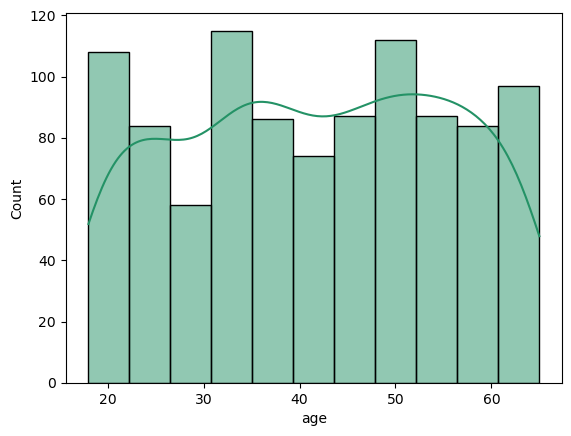

In [85]:
# 고객 연령 분포 시각화
sns.set_palette("summer")
sns.histplot(x = 'age', data = data, kde = True)


# 데이터 전처리하기
### 굿즈 분석하기

In [86]:
data['Goods'].value_counts()

T-shirt     187
sticker     171
notebook    157
pen         149
bottle      145
bike        142
Name: Goods, dtype: int64

In [87]:
# 오류 방지를 위해 None 값을 NaN 값으로 채우기
data['Goods'] = data['Goods'].replace('None', np.nan)
data[‘Goods’].isna().sum()

SyntaxError: invalid character '‘' (U+2018) (1284140063.py, line 3)

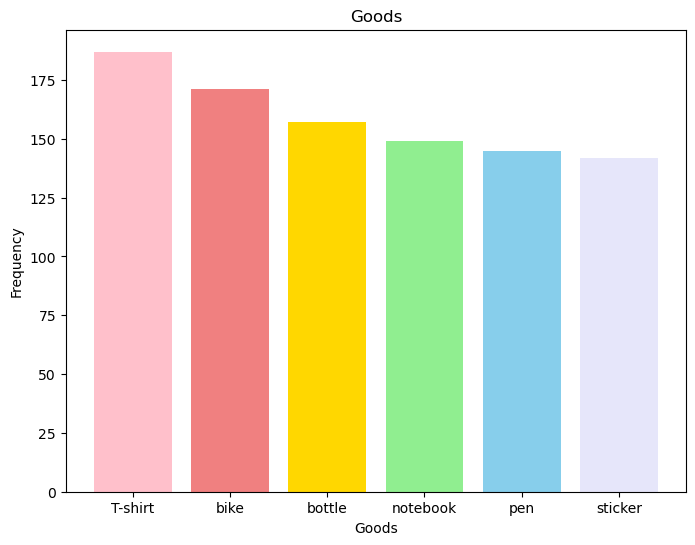

In [88]:
# 시각화하기
categories = ["T-shirt", "bike", "bottle", "notebook", "pen", "sticker"]
goods = data['Goods'].value_counts()

plt.figure(figsize = (8, 6))
plt.bar(categories, goods, color = ["pink", "lightcoral", "gold", "lightgreen", "skyblue", 'lavender'])
plt.title("Goods")
plt.xlabel("Goods")
plt.ylabel("Frequency")
plt.show()

In [89]:
# 굿즈별 구매한 고객의 연령 분포 확인하기
age_grouped = data.groupby("Goods")["age"].value_counts()
age_grouped

Goods    age
T-shirt  50     10
         55      9
         58      7
         60      7
         20      6
                ..
sticker  22      1
         47      1
         50      1
         61      1
         62      1
Name: age, Length: 270, dtype: int64

In [90]:
# 굿즈별 고객이 구매한 구매일 횟수 확인하기
date_grouped = data.groupby('Goods')['buy_date'].value_counts()
date_grouped

Goods    buy_date  
T-shirt  2022-12-31    6
         2022-11-27    5
         2022-12-19    4
         2022-12-21    4
         2022-05-15    3
                      ..
sticker  2022-12-14    1
         2022-12-15    1
         2022-12-17    1
         2022-12-19    1
         2022-12-20    1
Name: buy_date, Length: 673, dtype: int64

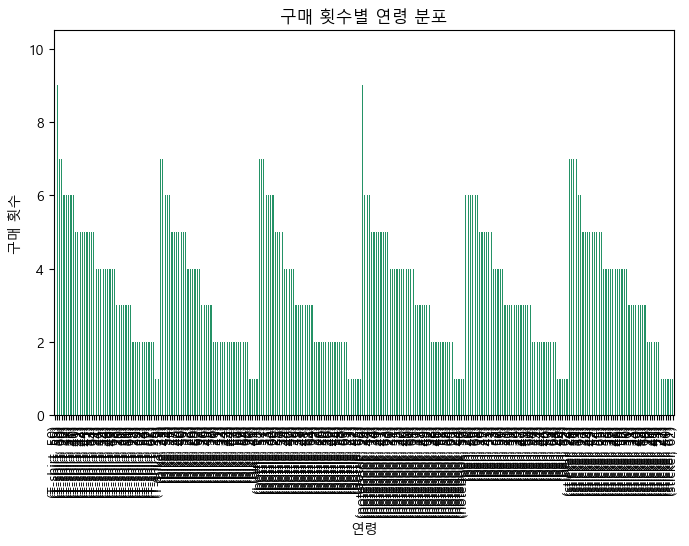

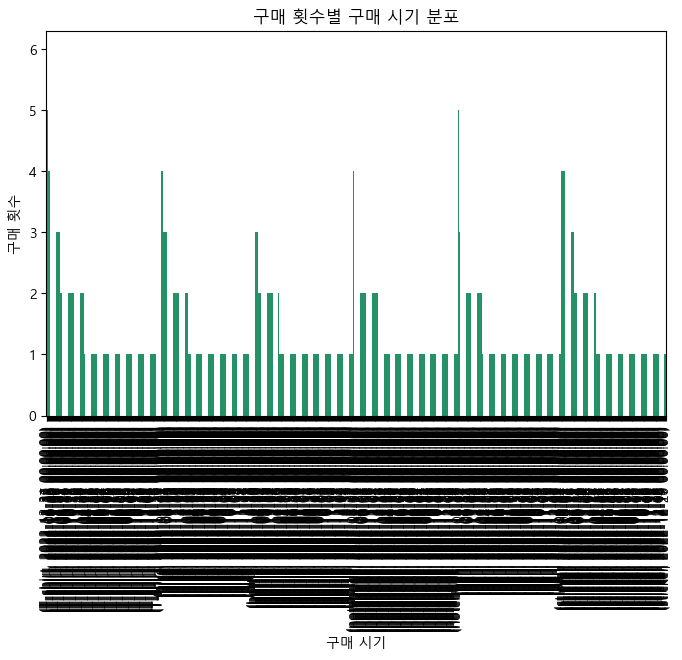

In [91]:
# 한글 깨짐 방지를 위한 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 구매 횟수별 연령 분포 시각화
plt.figure(figsize = (8, 5))
age_grouped.plot(kind = 'bar')
plt.title('구매 횟수별 연령 분포')
plt.xlabel('연령')
plt.ylabel('구매 횟수')
plt.show()

# 구매 횟수별 구매 빈도 시각화
plt.figure(figsize = (8, 5))
date_grouped.plot(kind = 'bar')
plt.title('구매 횟수별 구매 시기 분포')
plt.xlabel('구매 시기')
plt.ylabel('구매 횟수')
plt.show()

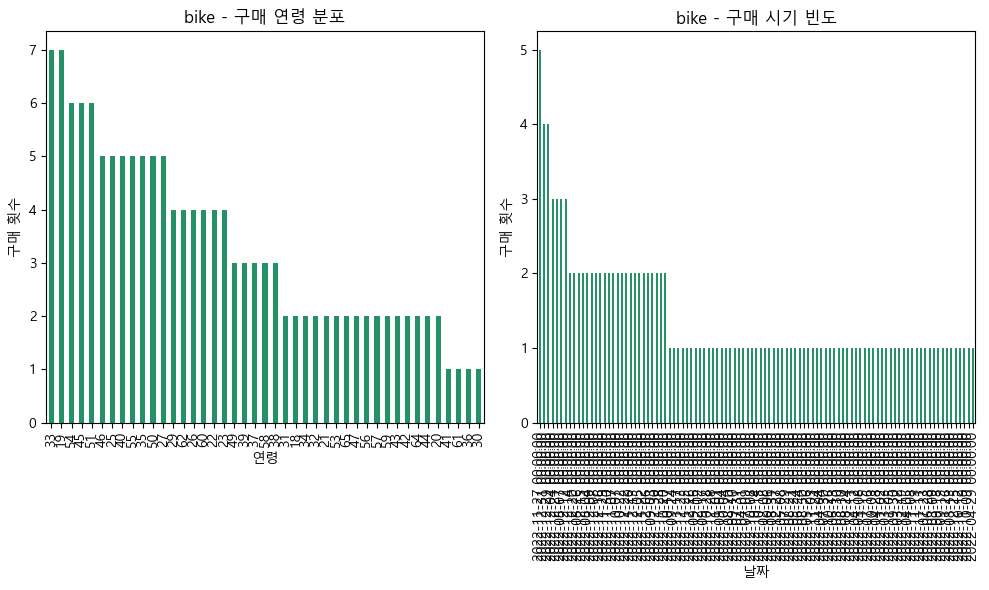

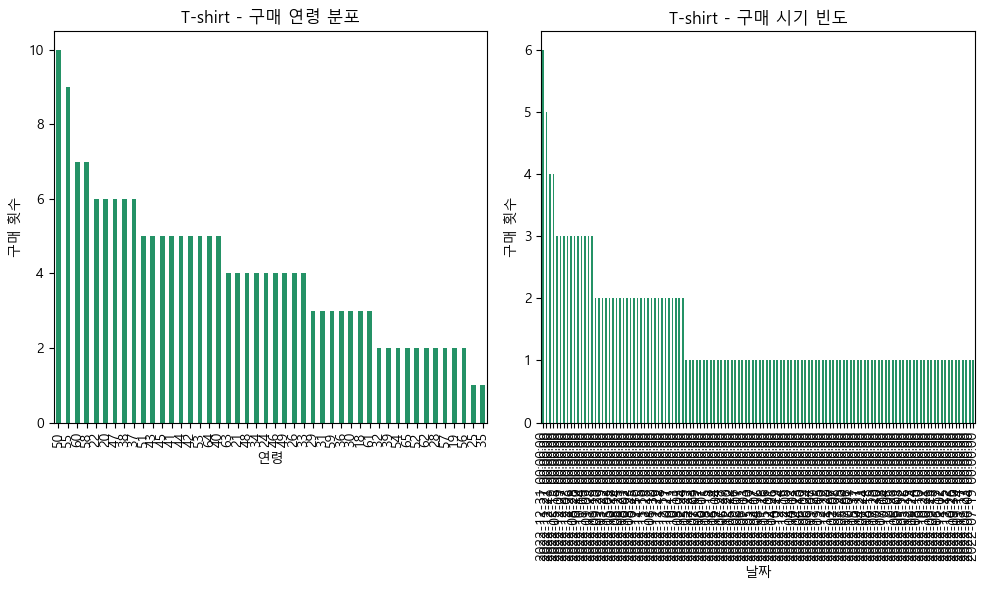

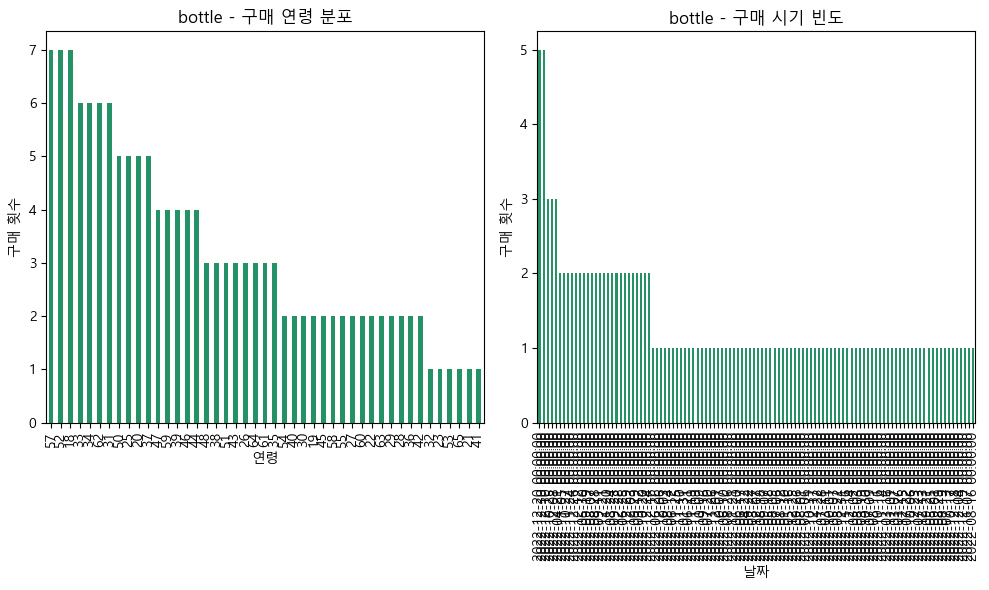

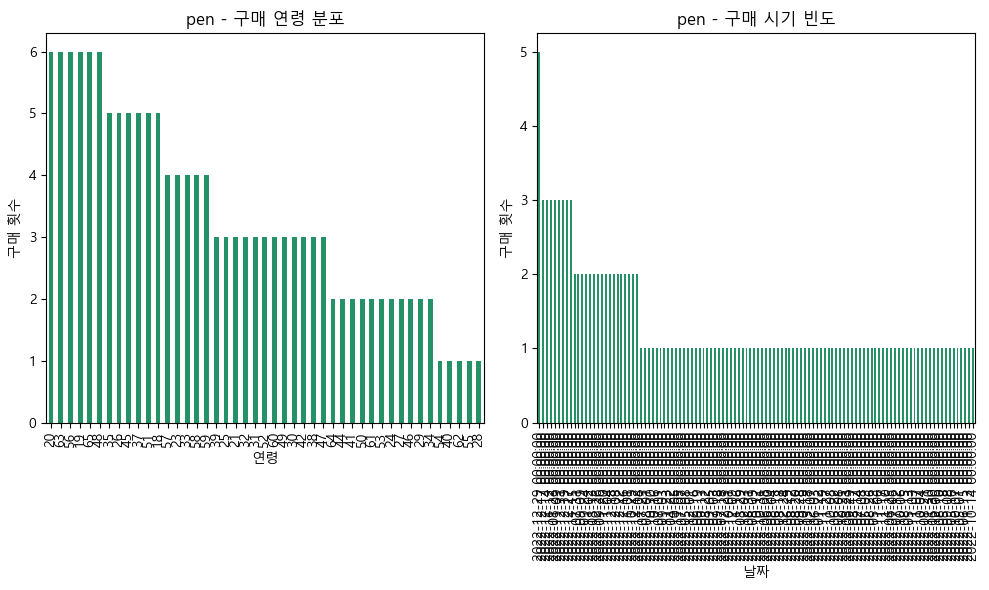

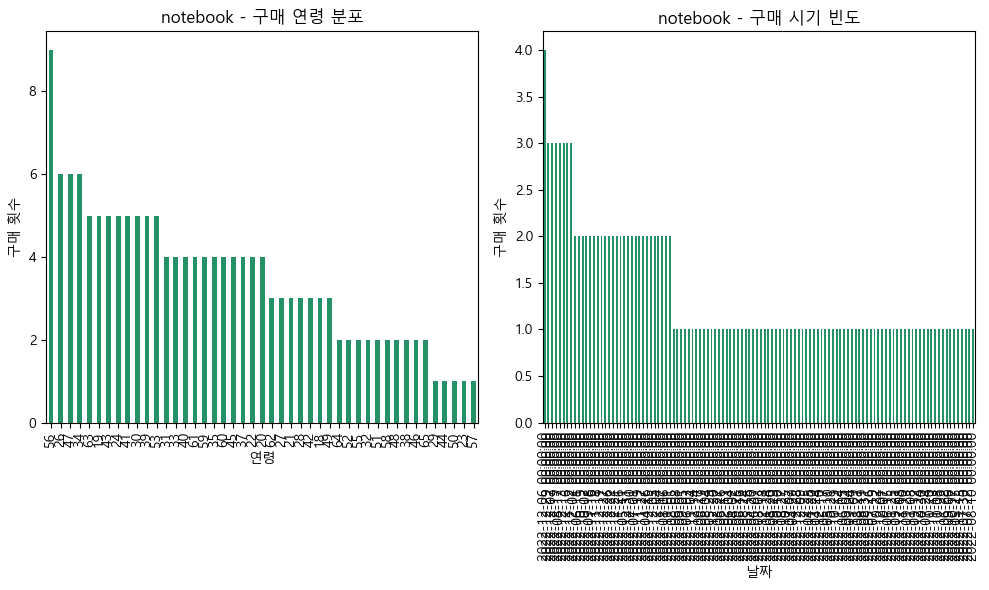

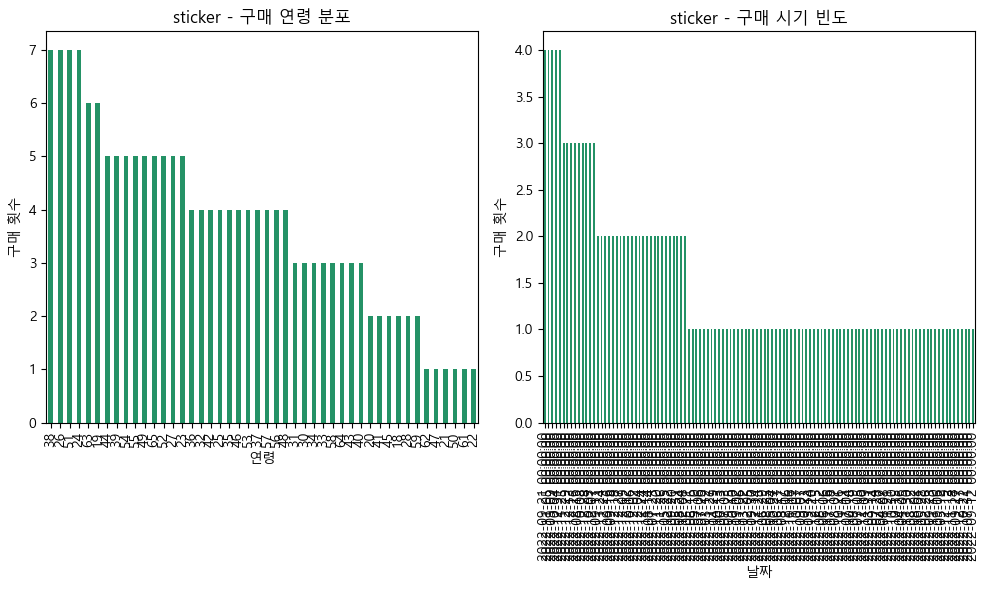

In [92]:
# 굿즈별 시각화
unique_goods = data['Goods'].unique()

# 한글 깨짐 방지를 위한 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 각 굿즈별로 시각화
for goods in unique_goods:
    # 굿즈별 데이터 필터링
    goods_data = data[data['Goods'] == goods]
    
    if goods_data.empty:
        continue
    
    # 'age' 열을 기준으로 연령별 빈도 계산
    age_grouped = goods_data['age'].value_counts()
    
    # 'buy_date' 열을 기준으로 시기별 빈도 계산
    date_grouped = goods_data['buy_date'].value_counts()
    
    # 연령별 빈도 시각화
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    age_grouped.plot(kind = 'bar')
    plt.title(f'{goods} - 구매 연령 분포')
    plt.xlabel('연령')
    plt.ylabel('구매 횟수')
    
    # 시기별 빈도 시각화
    plt.subplot(1, 2, 2)
    date_grouped.plot(kind = 'bar')
    plt.title(f'{goods} - 구매 시기 빈도')
    plt.xlabel('날짜')
    plt.ylabel('구매 횟수')
    
    plt.tight_layout()
    plt.show()

In [93]:
# 연령 및 날짜 정렬하여 꺾은 선 그래프로 나타내기
# 원본 데이터 손상 방지를 위한 데이터 프레임 복제
data_copy = pd.DataFrame(data.copy())
data_copy

gender  age   address  funnel  cart_date buy_yn   buy_date    Goods  \
0        F   31   강원도 홍천군  Direct 2022-08-22      Y 2022-08-30     bike   
1        M   48  충청남도 공주시  Direct 2022-05-09      Y 2022-05-15  T-shirt   
2        M   41   강원도 인제군    Paid 2022-08-09      Y 2022-09-26   bottle   
3        M   40   강원도 철원군    Paid 2022-01-06      Y 2022-11-11     bike   
4        M   22  경기도 동두천시    Paid 2022-11-18      Y 2022-12-20   bottle   
..     ...  ...       ...     ...        ...    ...        ...      ...   
987      F   64  충청남도 공주시   Cross 2022-02-16      Y 2022-09-16  T-shirt   
988      M   48     부산광역시  Direct 2022-12-28      Y 2022-12-29      pen   
989      M   37  경상남도 창녕군   Cross 2022-10-08      Y 2022-10-14      pen   
990      M   22  전라북도 익산시   Cross 2022-02-09      Y 2022-07-19  T-shirt   
991      F   33   강원도 평창군   Cross 2022-10-04      Y 2022-12-08  sticker   

     date_diff  
0            8  
1            6  
2           48  
3          309  
4           32  
..         ...  
987        212  
988          1  
989          6  
990        160  
991         65  

[992 rows x 9 columns]

In [94]:
# 굿즈별 연령
# 결과에서 unstack()을 사용하여 피벗 테이블 형태로 만들고 NaN 값을 0으로 채웁니다.
age_count = data_copy.groupby('Goods')['age'].value_counts().unstack().fillna(0)
age_count

age        18   19   20   21   22   23   24   25   26   27  ...   56   57  \
Goods                                                       ...             
T-shirt   3.0  2.0  6.0  4.0  6.0  0.0  4.0  1.0  4.0  0.0  ...  2.0  2.0   
bike      2.0  7.0  2.0  2.0  4.0  4.0  0.0  5.0  4.0  5.0  ...  2.0  2.0   
bottle    7.0  2.0  5.0  1.0  2.0  1.0  0.0  5.0  3.0  2.0  ...  0.0  7.0   
notebook  3.0  5.0  4.0  3.0  4.0  1.0  5.0  0.0  6.0  3.0  ...  9.0  1.0   
pen       5.0  6.0  6.0  3.0  0.0  4.0  2.0  3.0  5.0  2.0  ...  6.0  4.0   
sticker   2.0  6.0  2.0  1.0  1.0  5.0  7.0  4.0  7.0  5.0  ...  4.0  4.0   

age        58   59   60   61   62   63   64   65  
Goods                                             
T-shirt   7.0  3.0  7.0  3.0  2.0  4.0  5.0  2.0  
bike      3.0  2.0  4.0  1.0  4.0  0.0  2.0  2.0  
bottle    2.0  4.0  2.0  3.0  6.0  2.0  3.0  1.0  
notebook  2.0  4.0  4.0  4.0  3.0  5.0  2.0  2.0  
pen       4.0  4.0  3.0  2.0  1.0  6.0  2.0  6.0  
sticker   3.0  2.0  0.0  1.0  1.0  6.0  3.0  5.0  

[6 rows x 48 columns]

In [95]:
# 결과를 연령 순으로 정렬
age_count = age_count.reindex(sorted(age_count.columns), axis=1)
colors = ['blue', 'red', 'green', 'purple', 'pink', 'yellowgreen']

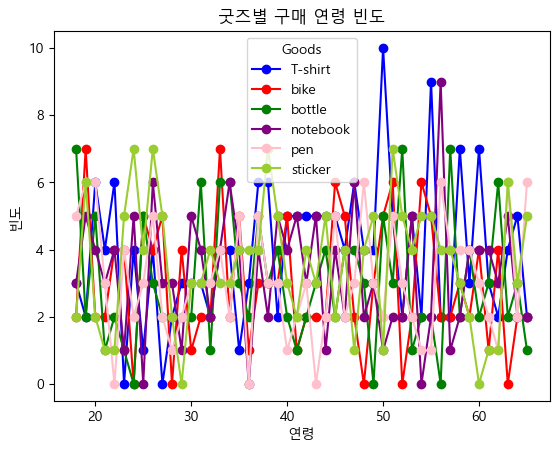

In [96]:
# 꺾은선 그래프로 시각화
age_count.T.plot(marker='o', color = colors)
plt.title('굿즈별 구매 연령 빈도')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.legend(title='Goods')
plt.show()

In [97]:
# Plotly로 인터랙티브 꺾은선 그래프 생성
import plotly.express as px
fig = px.line(age_count.T, markers=True, title='굿즈별 구매 연령 빈도',color = "Goods")
fig.update_xaxes(title_text='연령')
fig.update_yaxes(title_text='빈도')
fig.update_traces(line=dict(width=2))  # 그래프 라인 두께 설정
fig.show()

In [98]:
# 굿즈별 구매일
# 결과에서 unstack()을 사용하여 피벗 테이블 형태로 만들고 NaN 값을 0으로 채웁니다.
buy_count = data_copy.groupby('Goods')['buy_date'].value_counts().unstack().fillna(0)
buy_count

buy_date  2022-01-22  2022-01-24  2022-01-26  2022-01-30  2022-01-31  \
Goods                                                                  
T-shirt          0.0         0.0         0.0         0.0         0.0   
bike             0.0         0.0         0.0         0.0         0.0   
bottle           0.0         0.0         1.0         1.0         1.0   
notebook         0.0         1.0         0.0         0.0         0.0   
pen              1.0         0.0         0.0         0.0         0.0   
sticker          0.0         0.0         0.0         0.0         0.0   

buy_date  2022-02-07  2022-02-08  2022-02-11  2022-02-14  2022-02-16  ...  \
Goods                                                                 ...   
T-shirt          1.0         0.0         0.0         0.0         0.0  ...   
bike             0.0         1.0         0.0         0.0         0.0  ...   
bottle           0.0         0.0         0.0         0.0         0.0  ...   
notebook         0.0         0.0         1.0         0.0         0.0  ...   
pen              0.0         1.0         0.0         1.0         1.0  ...   
sticker          0.0         0.0         0.0         0.0         0.0  ...   

buy_date  2022-12-22  2022-12-23  2022-12-24  2022-12-25  2022-12-26  \
Goods                                                                  
T-shirt          1.0         1.0         2.0         0.0         3.0   
bike             2.0         1.0         0.0         1.0         1.0   
bottle           0.0         1.0         2.0         1.0         2.0   
notebook         2.0         0.0         1.0         1.0         2.0   
pen              2.0         1.0         1.0         0.0         2.0   
sticker          2.0         2.0         2.0         0.0         3.0   

buy_date  2022-12-27  2022-12-28  2022-12-29  2022-12-30  2022-12-31  
Goods                                                                 
T-shirt          3.0         2.0         2.0         2.0         6.0  
bike             1.0         1.0         4.0         2.0         4.0  
bottle           0.0         2.0         2.0         5.0         1.0  
notebook         2.0         1.0         3.0         2.0         2.0  
pen              3.0         0.0         5.0         0.0         3.0  
sticker          2.0         3.0         3.0         0.0         4.0  

[6 rows x 271 columns]

In [99]:
# 결과를 연령 순으로 정렬
buy_count = buy_count.reindex(sorted(buy_count.columns), axis=1)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

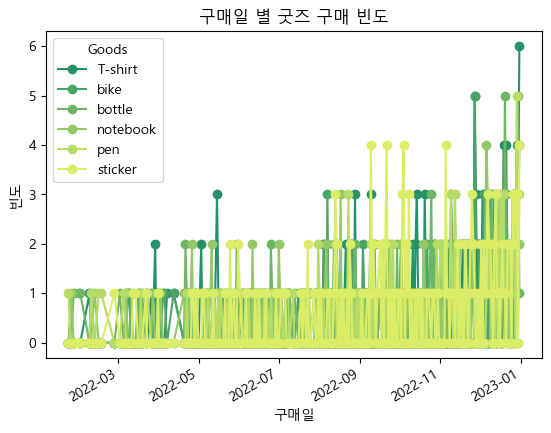

In [100]:
# 꺾은선 그래프로 시각화
buy_count.T.plot(marker='o')
plt.title('구매일 별 굿즈 구매 빈도')
plt.xlabel('구매일')
plt.ylabel('빈도')
plt.legend(title='Goods')
plt.show()

In [101]:
# Plotly로 인터랙티브 꺾은선 그래프 생성
import plotly.express as px

fig = px.line(buy_count.T, markers=True, title='구매일 별 굿즈 구매 빈도',color = "Goods")

fig.update_xaxes(title_text='구매일')
fig.update_yaxes(title_text='빈도')
fig.update_traces(line=dict(width=2))  # 그래프 라인 두께 설정
fig.show()

# 데이터셋 전처리하기
### 성별 분석하기

In [102]:
data['gender'].value_counts()

F    505
M    487
Name: gender, dtype: int64

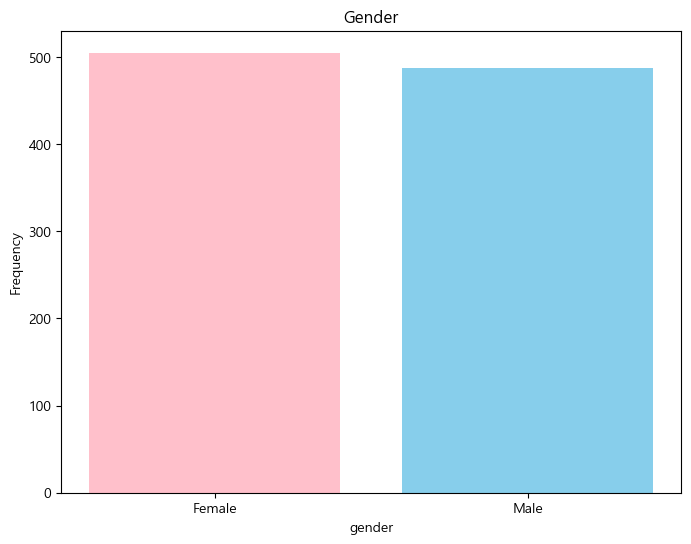

In [103]:
# 시각화하기
female = data['gender'].value_counts()[0]
male = data['gender'].value_counts()[1]
plt.figure(figsize = (8, 6))
categories = ["Female", "Male"]
gender = [female, male]

plt.bar(categories, gender, color = ["pink", "skyblue"])
plt.title("Gender")
plt.xlabel("gender")
plt.ylabel("Frequency")
plt.show()

In [104]:
# 'gender'와 'Goods' 열을 기준으로 빈도 계산
gender_goods_counts = data.groupby(['gender', 'Goods']).size().unstack(fill_value=0)

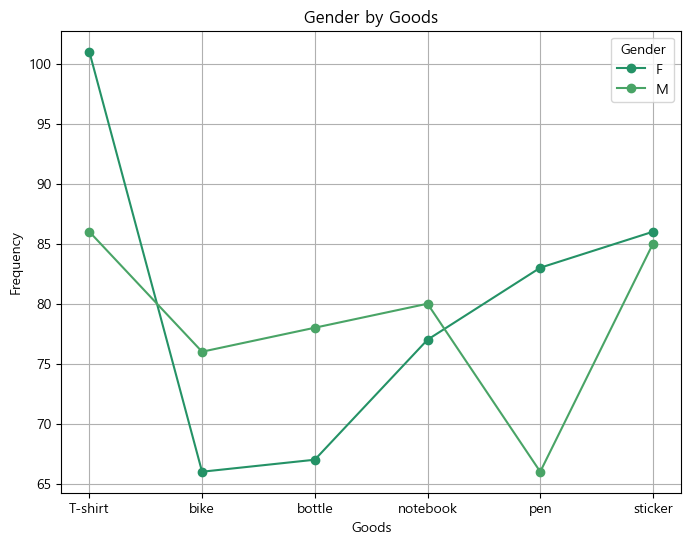

In [105]:
# 선 그래프 그리기
plt.figure(figsize=(8, 6))

for gender in gender_goods_counts.index:
    plt.plot(gender_goods_counts.columns, gender_goods_counts.loc[gender], marker='o', label=gender)

plt.title("Gender by Goods")
plt.xlabel("Goods")
plt.ylabel("Frequency")
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [106]:
# Plotly로 인터랙티브 꺾은선 그래프 생성

import plotly.express as px

# 'gender'와 'Goods' 열을 기준으로 빈도 계산
gender_goods_counts = data.groupby(['gender', 'Goods']).size().reset_index(name='Frequency')

# Plotly Express를 사용하여 선 그래프 그리기
fig = px.line(gender_goods_counts, x='Goods', y='Frequency', color='gender', title="Gender by Goods")
fig.update_xaxes(title_text="Goods")
fig.update_yaxes(title_text="Frequency")
fig.show()

# 데이터셋 전처리하기
### 주소(시) 분리하기

In [107]:
data['address'].value_counts()

충청남도 서천군    12
경상북도 울릉군    12
경기도 부천시     12
경기도 의왕시     12
경기도 안산시     12
            ..
전라남도 함평군     2
강원도 정선군      2
경기도 광명시      1
강원도 고성군      1
경상북도 구미시     1
Name: address, Length: 161, dtype: int64

<Axes: xlabel='count', ylabel='address'>

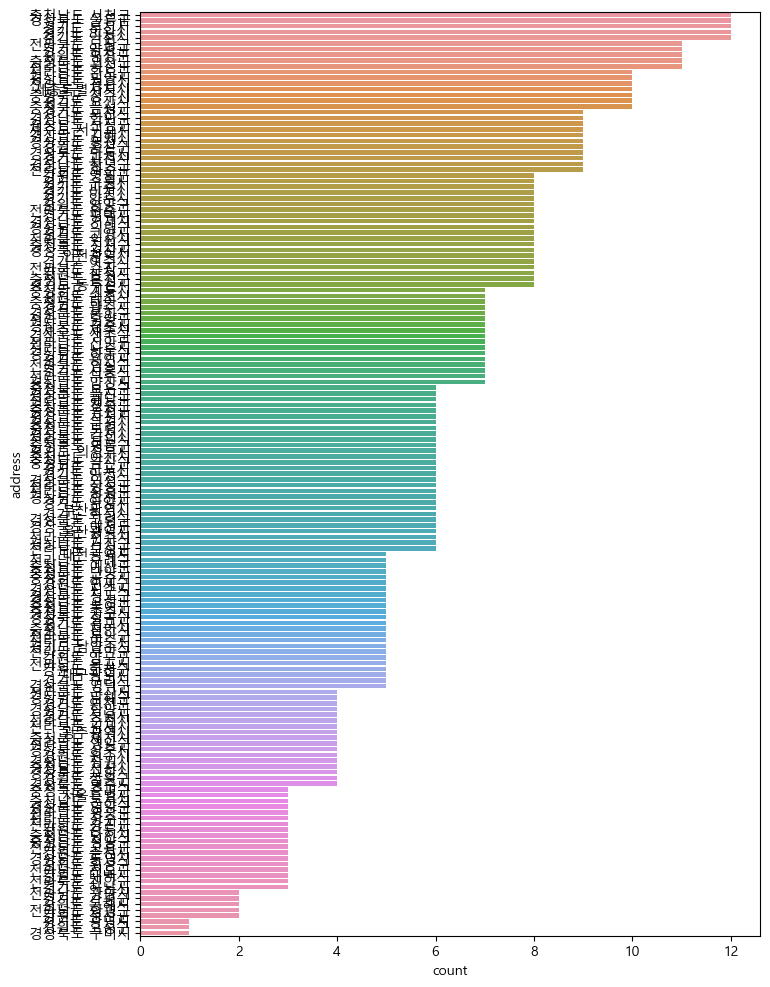

In [108]:
# 시각화하기
plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize = (8, 12))
sns.countplot(y = 'address', data = data,
             order = data['address'].value_counts().index)

In [109]:
# 도, 시 분리하기
data['do'] = np.nan
data['si'] = np.nan

special = ['서울특별시', '부산광역시', '대구광역시', '광주광역시', '울산광역시',
           '세종특별자치시', '인천광역시', '대전광역시']

for index, row in data.iterrows():
    address = row['address']
    parts = address.split(' ')
    
    if parts[0] in special:
        data.at[index, 'do'] = parts[0]
        data.at[index, 'si'] = parts[0]
        
    else:
        data.at[index, 'do'] = parts[0]
        if len(parts) > 1:
            data.at[index, 'si'] = parts[1]

data.drop(['address'], axis=1, inplace=True)
data

gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff  \
0        F   31  Direct 2022-08-22      Y 2022-08-30     bike          8   
1        M   48  Direct 2022-05-09      Y 2022-05-15  T-shirt          6   
2        M   41    Paid 2022-08-09      Y 2022-09-26   bottle         48   
3        M   40    Paid 2022-01-06      Y 2022-11-11     bike        309   
4        M   22    Paid 2022-11-18      Y 2022-12-20   bottle         32   
..     ...  ...     ...        ...    ...        ...      ...        ...   
987      F   64   Cross 2022-02-16      Y 2022-09-16  T-shirt        212   
988      M   48  Direct 2022-12-28      Y 2022-12-29      pen          1   
989      M   37   Cross 2022-10-08      Y 2022-10-14      pen          6   
990      M   22   Cross 2022-02-09      Y 2022-07-19  T-shirt        160   
991      F   33   Cross 2022-10-04      Y 2022-12-08  sticker         65   

        do     si  
0      강원도    홍천군  
1     충청남도    공주시  
2      강원도    인제군  
3      강원도    철원군  
4      경기도   동두천시  
..     ...    ...  
987   충청남도    공주시  
988  부산광역시  부산광역시  
989   경상남도    창녕군  
990   전라북도    익산시  
991    강원도    평창군  

[992 rows x 10 columns]

In [110]:
# 'do'에 따라 각 지역의 위도와 경도 매핑
latitude_dict = {
    '강원도': 37.724962,
    '경기도': 37.528914,
    '경상남도': 35.369563,
    '경상북도': 36.343601,
    '광주광역시': 35.155736,
    '대구광역시': 35.829437,
    '대전광역시': 36.339818,
    '부산광역시': 35.210014,
    '서울특별시': 37.551891,
    '세종특별자치시': 36.560698,
    '울산광역시': 35.553723,
    '인천광역시': 37.456256,
    '전라남도': 34.940200,
    '전라북도': 35.719720,
    '제주도': 33.384622,
    '충청남도': 36.529600,
    '충청북도': 36.737845
}

longitude_dict = {
    '강원도': 128.300963,
    '경기도': 127.172777,
    '경상남도': 128.257013,
    '경상북도': 128.740157,
    '광주광역시': 126.835427,
    '대구광역시': 128.565512,
    '대전광역시': 127.394049,
    '부산광역시': 129.068870,
    '서울특별시': 126.991794,
    '세종특별자치시': 127.258733,
    '울산광역시': 129.238055,
    '인천광역시': 126.705206,
    '전라남도': 126.956500,
    '전라북도': 127.124398,
    '제주도': 126.553493,
    '충청남도': 126.859062,
    '충청북도': 127.830524
}

# 'do' 열을 사용하여 해당 지역의 위도와 경도 설정
data['latitude_do'] = data['do'].map(latitude_dict)
data['longitude_do'] = data['do'].map(longitude_dict)

# NaN 값을 가진 행은 제거
data = data.dropna(subset=['latitude_do', 'longitude_do'])

# 결과 확인
print(data[['do', 'latitude_do', 'longitude_do']].head())

     do  latitude_do  longitude_do
0   강원도    37.724962    128.300963
1  충청남도    36.529600    126.859062
2   강원도    37.724962    128.300963
3   강원도    37.724962    128.300963
4   경기도    37.528914    127.172777


In [111]:
# 잘못 매핑된 데이터가 존재하는지 확인하기
data["do"].value_counts()
data.groupby("do")['latitude_do'].value_counts()


do       latitude_do
강원도      37.724962       91
경기도      37.528914      219
경상남도     35.369563      119
경상북도     36.343601      132
광주광역시    35.155736        4
대구광역시    35.829437        5
대전광역시    36.339818        5
부산광역시    35.210014        6
서울특별시    37.551891        3
세종특별자치시  36.560698       10
울산광역시    35.553723        6
인천광역시    37.456256        8
전라남도     34.940200      119
전라북도     35.719720       90
제주도      33.384622       16
충청남도     36.529600       85
충청북도     36.737845       74
Name: latitude_do, dtype: int64

In [112]:
import geopandas as gpd

# GeoJSON 파일 불러오기
geojson_file = "./TL_SCCO_CTPRVN.json"
gdf = gpd.read_file(geojson_file)

# GeoDataFrame의 "CTP_KOR_NM" 열을 "do"로 변경
gdf.rename(columns={"CTP_KOR_NM": "do"}, inplace=True)

# 'do' 컬럼의 빈도수 계산
do_frequencies = data['do'].value_counts().reset_index()
do_frequencies.columns = ['do', 'frequency']

# 빈도수 정보를 GeoDataFrame과 병합
gdf = gdf.merge(do_frequencies, on='do', how='left')

# 지도 시각화 생성
fig = px.choropleth(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color="frequency",
    hover_name="do",
    color_continuous_scale=px.colors.diverging.Tealrose,
)

# 시각화 옵션 설정
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title="지도 시각화",
    geo=dict(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white"),
)

# 지도 시각화 표시
fig.show()


# 지역 코드

In [113]:
geo_data = pd.read_excel("./한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx", sheet_name=1)
geo_data

* 본 시점별 연계자료는 이용자 편의를 위한 참고용 자료임, 각 기준시점별 총괄표 사용 시, 중복 행정구역은 삭제 후 사용   \
0                                            2018.11.5.                      
1                                                    11                      
2                                                 11010                      
3                                               1101072                      
4                                               1101072                      
...                                                 ...                      
4304                                            3902011                      
4305                                            3902012                      
4306                                            3902013                      
4307                                            3902031                      
4308                                            3902032                      

     Unnamed: 1  Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6  \
0         행정구역명  2018.11.1.      행정구역명  2018.10.8.      행정구역명  2018.10.5.   
1         서울특별시          11      서울특별시          11      서울특별시          11   
2           종로구       11010        종로구       11010        종로구       11010   
3         청운효자동     1101072      청운효자동     1101072      청운효자동     1101072   
4         청운효자동     1101072      청운효자동     1101072      청운효자동     1101072   
...         ...         ...        ...         ...        ...         ...   
4304        대정읍     3902011        대정읍     3902011        대정읍     3902011   
4305        남원읍     3902012        남원읍     3902012        남원읍     3902012   
4306        성산읍     3902013        성산읍     3902013        성산읍     3902013   
4307        안덕면     3902031        안덕면     3902031        안덕면     3902031   
4308        표선면     3902032        표선면     3902032        표선면     3902032   

     Unnamed: 7  Unnamed: 8 Unnamed: 9  ... Unnamed: 232 Unnamed: 233  \
0         행정구역명  2018.10.1.      행정구역명  ...     2002.4.1        행정구역명   
1         서울특별시          11      서울특별시  ...           11        서울특별시   
2           종로구       11010        종로구  ...        11010          종로구   
3         청운효자동     1101072      청운효자동  ...      1101051          청운동   
4         청운효자동     1101072      청운효자동  ...      1101052          효자동   
...         ...         ...        ...  ...          ...          ...   
4304        대정읍     3902011        대정읍  ...      3932011          대정읍   
4305        남원읍     3902012        남원읍  ...      3932012          남원읍   
4306        성산읍     3902013        성산읍  ...      3932013          성산읍   
4307        안덕면     3902031        안덕면  ...      3932031          안덕면   
4308        표선면     3902032        표선면  ...      3932032          표선면   

     Unnamed: 234 Unnamed: 235 Unnamed: 236 Unnamed: 237 Unnamed: 238  \
0        2002.1.1        행정구역명    2001.1. 1        행정구역명    2000.1. 1   
1              11        서울특별시           11        서울특별시           11   
2           11010          종로구        11010          종로구        11010   
3         1101051          청운동      1101051          청운동      1101051   
4         1101052          효자동      1101052          효자동      1101052   
...           ...          ...          ...          ...          ...   
4304      3932011          대정읍      3932011          대정읍      3932011   
4305      3932012          남원읍      3932012          남원읍      3932012   
4306      3932013          성산읍      3932013          성산읍      3932013   
4307      3932031          안덕면      3932031          안덕면      3932031   
4308      3932032          표선면      3932032          표선면      3932032   

     Unnamed: 239 Unnamed: 240 Unnamed: 241  
0           행정구역명     99. 1. 1        행정구역명  
1           서울특별시           11        서울특별시  
2             종로구        11010          종로구  
3             청운동      1101051          청운동  
4             효자동      1101052          효자동  
...           ...          ...          ...  
4304          대정읍      3932011          대정읍  
4305          남원읍    

In [114]:
geo_code = geo_data["Unnamed: 2"]
del geo_code[0]
geo_code

1            11
2         11010
3       1101072
4       1101072
5       1101053
         ...   
4304    3902011
4305    3902012
4306    3902013
4307    3902031
4308    3902032
Name: Unnamed: 2, Length: 4308, dtype: object

In [115]:
# 열을 문자열로 변환 후 앞의 두 자리만 추출
geo_code = geo_code.astype(str).apply(lambda x: x[:2])

# 중복 제거
geo_code = geo_code.drop_duplicates().reset_index(drop=True)
geo_code = geo_code.rename_axis('code')

In [116]:
# 지역 코드 값 외의 값은 삭제하기
indices_to_remove = [1, 13, 19]
geo_code = geo_code.drop(indices_to_remove).reset_index(drop=True)

geo_code

0     11
1     21
2     22
3     23
4     24
5     25
6     26
7     29
8     31
9     32
10    33
11    34
12    35
13    36
14    37
15    38
16    39
Name: Unnamed: 2, dtype: object

In [117]:
# 지역과 지역 코드 매핑하기
region = ["서울특별시", "부산광역시", "대구광역시", "인천광역시", "광주광역시", "대전광역시",
         "울산광역시", "세종특별자치시", "경기도", "강원도", "충청북도", "충청남도", "전라북도", "전라남도",
         "경상북도", "경상남도", "제주도"]

geo_code = dict(zip(region, geo_code))

geo_code

{'서울특별시': '11',
 '부산광역시': '21',
 '대구광역시': '22',
 '인천광역시': '23',
 '광주광역시': '24',
 '대전광역시': '25',
 '울산광역시': '26',
 '세종특별자치시': '29',
 '경기도': '31',
 '강원도': '32',
 '충청북도': '33',
 '충청남도': '34',
 '전라북도': '35',
 '전라남도': '36',
 '경상북도': '37',
 '경상남도': '38',
 '제주도': '39'}

In [118]:
# data의 지역과 지역 코드 매핑하기
data['code'] = data['do'].map(geo_code)
data

gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff  \
0        F   31  Direct 2022-08-22      Y 2022-08-30     bike          8   
1        M   48  Direct 2022-05-09      Y 2022-05-15  T-shirt          6   
2        M   41    Paid 2022-08-09      Y 2022-09-26   bottle         48   
3        M   40    Paid 2022-01-06      Y 2022-11-11     bike        309   
4        M   22    Paid 2022-11-18      Y 2022-12-20   bottle         32   
..     ...  ...     ...        ...    ...        ...      ...        ...   
987      F   64   Cross 2022-02-16      Y 2022-09-16  T-shirt        212   
988      M   48  Direct 2022-12-28      Y 2022-12-29      pen          1   
989      M   37   Cross 2022-10-08      Y 2022-10-14      pen          6   
990      M   22   Cross 2022-02-09      Y 2022-07-19  T-shirt        160   
991      F   33   Cross 2022-10-04      Y 2022-12-08  sticker         65   

        do     si  latitude_do  longitude_do code  
0      강원도    홍천군    37.724962    128.300963   32  
1     충청남도    공주시    36.529600    126.859062   34  
2      강원도    인제군    37.724962    128.300963   32  
3      강원도    철원군    37.724962    128.300963   32  
4      경기도   동두천시    37.528914    127.172777   31  
..     ...    ...          ...           ...  ...  
987   충청남도    공주시    36.529600    126.859062   34  
988  부산광역시  부산광역시    35.210014    129.068870   21  
989   경상남도    창녕군    35.369563    128.257013   38  
990   전라북도    익산시    35.719720    127.124398   35  
991    강원도    평창군    37.724962    128.300963   32  

[992 rows x 13 columns]

In [141]:
# 카이제곱 분석 및 상관 분석에 사용할 데이터 저장하기
temp_data = data.drop(["do", "latitude_do", "longitude_do", "si",], axis=1)
temp_data

gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff code
0        F   31  Direct 2022-08-22      Y 2022-08-30     bike          8   32
1        M   48  Direct 2022-05-09      Y 2022-05-15  T-shirt          6   34
2        M   41    Paid 2022-08-09      Y 2022-09-26   bottle         48   32
3        M   40    Paid 2022-01-06      Y 2022-11-11     bike        309   32
4        M   22    Paid 2022-11-18      Y 2022-12-20   bottle         32   31
..     ...  ...     ...        ...    ...        ...      ...        ...  ...
987      F   64   Cross 2022-02-16      Y 2022-09-16  T-shirt        212   34
988      M   48  Direct 2022-12-28      Y 2022-12-29      pen          1   21
989      M   37   Cross 2022-10-08      Y 2022-10-14      pen          6   38
990      M   22   Cross 2022-02-09      Y 2022-07-19  T-shirt        160   35
991      F   33   Cross 2022-10-04      Y 2022-12-08  sticker         65   32

[992 rows x 9 columns]

In [120]:
temp_data

gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff code
0        F   31  Direct 2022-08-22      Y 2022-08-30     bike          8   32
1        M   48  Direct 2022-05-09      Y 2022-05-15  T-shirt          6   34
2        M   41    Paid 2022-08-09      Y 2022-09-26   bottle         48   32
3        M   40    Paid 2022-01-06      Y 2022-11-11     bike        309   32
4        M   22    Paid 2022-11-18      Y 2022-12-20   bottle         32   31
..     ...  ...     ...        ...    ...        ...      ...        ...  ...
987      F   64   Cross 2022-02-16      Y 2022-09-16  T-shirt        212   34
988      M   48  Direct 2022-12-28      Y 2022-12-29      pen          1   21
989      M   37   Cross 2022-10-08      Y 2022-10-14      pen          6   38
990      M   22   Cross 2022-02-09      Y 2022-07-19  T-shirt        160   35
991      F   33   Cross 2022-10-04      Y 2022-12-08  sticker         65   32

[992 rows x 9 columns]

# 데이터셋 전처리하기
### 접속 경로 분석하기

In [121]:
data['funnel'].value_counts()

Cross      254
Paid       248
Organic    248
Direct     242
Name: funnel, dtype: int64

<Axes: xlabel='funnel', ylabel='count'>

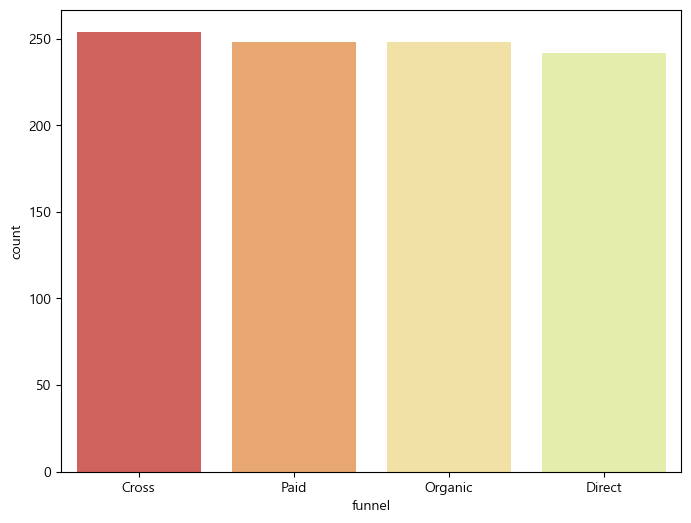

In [122]:
# 시각화하기
fig = plt.figure(figsize = (8, 6))
sns.set_palette("Spectral")
sns.countplot(x = 'funnel', data = data,
             order = data['funnel'].value_counts().index)

# 카이제곱 분석

In [123]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab([temp_data['funnel'], temp_data['gender'], temp_data['Goods']], temp_data['buy_yn'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)
# 결과 출력
print("카이제곱 통계량 (Chi-squared statistic):", chi2)
print("p-값 (p-value):", p)
print("자유도 (Degrees of freedom):", dof)
print("기대값 테이블 (Expected frequencies table):")
print(expected)

카이제곱 통계량 (Chi-squared statistic): 0.0
p-값 (p-value): 1.0
자유도 (Degrees of freedom): 0
기대값 테이블 (Expected frequencies table):
[[21.]
 [16.]
 [27.]
 [22.]
 [26.]
 [20.]
 [27.]
 [17.]
 [17.]
 [ 7.]
 [20.]
 [25.]
 [27.]
 [13.]
 [13.]
 [16.]
 [23.]
 [24.]
 [15.]
 [20.]
 [24.]
 [23.]
 [12.]
 [22.]
 [22.]
 [26.]
 [11.]
 [17.]
 [12.]
 [20.]
 [19.]
 [28.]
 [21.]
 [23.]
 [19.]
 [22.]
 [31.]
 [11.]
 [16.]
 [22.]
 [22.]
 [22.]
 [25.]
 [11.]
 [16.]
 [27.]
 [15.]
 [16.]]


<Figure size 1000x600 with 0 Axes>

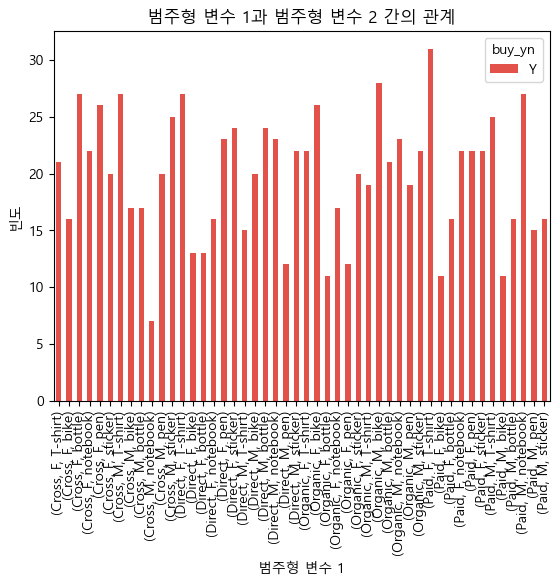

In [124]:
# 시각화하기
# 한글 폰트 설정
plt.figure(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')

contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('범주형 변수 1')
plt.ylabel('빈도')
plt.title('범주형 변수 1과 범주형 변수 2 간의 관계')
plt.show()

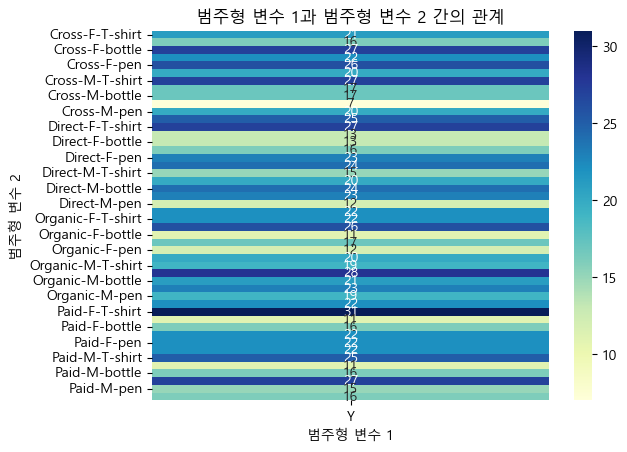

In [125]:
# 히트맵으로 나타내기
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', annot_kws={'fontsize': 10})
plt.xlabel('범주형 변수 1')
plt.ylabel('범주형 변수 2')
plt.title('범주형 변수 1과 범주형 변수 2 간의 관계')
plt.show()

# 상관분석
### 범주형 변수 수치형 변수로 변환하기

In [142]:
# 'gender' 열 수치형 변수로 변환하기
temp_data.loc[:, 'gender'] = temp_data.loc[:, 'gender'].replace('F', 1)
temp_data.loc[:, 'gender'] = temp_data.loc[:, 'gender'].replace('M', 2)

temp_data

C:\Users\user\AppData\Local\Temp\ipykernel_5588\3130793339.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff code
0         1   31  Direct 2022-08-22      Y 2022-08-30     bike          8   32
1         2   48  Direct 2022-05-09      Y 2022-05-15  T-shirt          6   34
2         2   41    Paid 2022-08-09      Y 2022-09-26   bottle         48   32
3         2   40    Paid 2022-01-06      Y 2022-11-11     bike        309   32
4         2   22    Paid 2022-11-18      Y 2022-12-20   bottle         32   31
..      ...  ...     ...        ...    ...        ...      ...        ...  ...
987       1   64   Cross 2022-02-16      Y 2022-09-16  T-shirt        212   34
988       2   48  Direct 2022-12-28      Y 2022-12-29      pen          1   21
989       2   37   Cross 2022-10-08      Y 2022-10-14      pen          6   38
990       2   22   Cross 2022-02-09      Y 2022-07-19  T-shirt        160   35
991       1   33   Cross 2022-10-04      Y 2022-12-08  sticker         65   32

[992 rows x 9 columns]

In [143]:
# 접속 경로 수치형으로 변환
temp_data.loc[:, 'funnel'] = temp_data.loc[:, 'funnel'].replace('Cross', 0)
temp_data.loc[:, 'funnel'] = temp_data.loc[:, 'funnel'].replace('Organic', 1)
temp_data.loc[:, 'funnel'] = temp_data.loc[:, 'funnel'].replace('Paid', 2)
temp_data.loc[:, 'funnel'] = temp_data.loc[:, 'funnel'].replace('Direct', 3)

temp_data

C:\Users\user\AppData\Local\Temp\ipykernel_5588\469473268.py:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



gender  age  funnel  cart_date buy_yn   buy_date    Goods  date_diff code
0         1   31       3 2022-08-22      Y 2022-08-30     bike          8   32
1         2   48       3 2022-05-09      Y 2022-05-15  T-shirt          6   34
2         2   41       2 2022-08-09      Y 2022-09-26   bottle         48   32
3         2   40       2 2022-01-06      Y 2022-11-11     bike        309   32
4         2   22       2 2022-11-18      Y 2022-12-20   bottle         32   31
..      ...  ...     ...        ...    ...        ...      ...        ...  ...
987       1   64       0 2022-02-16      Y 2022-09-16  T-shirt        212   34
988       2   48       3 2022-12-28      Y 2022-12-29      pen          1   21
989       2   37       0 2022-10-08      Y 2022-10-14      pen          6   38
990       2   22       0 2022-02-09      Y 2022-07-19  T-shirt        160   35
991       1   33       0 2022-10-04      Y 2022-12-08  sticker         65   32

[992 rows x 9 columns]

In [145]:
# 구매 여부
temp_data.loc[:, 'buy_yn'] = temp_data.loc[:, 'buy_yn'].replace('Y', 1)
temp_data.loc[:, 'buy_yn'] = temp_data.loc[:, 'buy_yn'].replace('N', 0)

temp_data

C:\Users\user\AppData\Local\Temp\ipykernel_5588\3995508183.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



gender  age  funnel  cart_date  buy_yn   buy_date    Goods  date_diff  \
0         1   31       3 2022-08-22       1 2022-08-30     bike          8   
1         2   48       3 2022-05-09       1 2022-05-15  T-shirt          6   
2         2   41       2 2022-08-09       1 2022-09-26   bottle         48   
3         2   40       2 2022-01-06       1 2022-11-11     bike        309   
4         2   22       2 2022-11-18       1 2022-12-20   bottle         32   
..      ...  ...     ...        ...     ...        ...      ...        ...   
987       1   64       0 2022-02-16       1 2022-09-16  T-shirt        212   
988       2   48       3 2022-12-28       1 2022-12-29      pen          1   
989       2   37       0 2022-10-08       1 2022-10-14      pen          6   
990       2   22       0 2022-02-09       1 2022-07-19  T-shirt        160   
991       1   33       0 2022-10-04       1 2022-12-08  sticker         65   

    code  
0     32  
1     34  
2     32  
3     32  
4     31  
..   ...  
987   34  
988   21  
989   38  
990   35  
991   32  

[992 rows x 9 columns]

In [146]:
# 굿즈
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('T-shirt', 0)
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('bike', 1)
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('bottle', 2)
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('notebook', 3)
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('pen', 4)
temp_data.loc[:, 'Goods'] = temp_data.loc[:, 'Goods'].replace('sticker', 5)

temp_data

C:\Users\user\AppData\Local\Temp\ipykernel_5588\3734313806.py:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



gender  age  funnel  cart_date  buy_yn   buy_date  Goods  date_diff code
0         1   31       3 2022-08-22       1 2022-08-30    1.0          8   32
1         2   48       3 2022-05-09       1 2022-05-15    0.0          6   34
2         2   41       2 2022-08-09       1 2022-09-26    2.0         48   32
3         2   40       2 2022-01-06       1 2022-11-11    1.0        309   32
4         2   22       2 2022-11-18       1 2022-12-20    2.0         32   31
..      ...  ...     ...        ...     ...        ...    ...        ...  ...
987       1   64       0 2022-02-16       1 2022-09-16    0.0        212   34
988       2   48       3 2022-12-28       1 2022-12-29    4.0          1   21
989       2   37       0 2022-10-08       1 2022-10-14    4.0          6   38
990       2   22       0 2022-02-09       1 2022-07-19    0.0        160   35
991       1   33       0 2022-10-04       1 2022-12-08    5.0         65   32

[992 rows x 9 columns]

In [147]:
# 'cart_date'와 'buy_date' 열을 UNIX 타임스탬프로 변환하고 그 값을 정수로 변환
temp_data['cart_date'] = (pd.to_datetime(temp_data['cart_date']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
temp_data['buy_date'] = (pd.to_datetime(temp_data['buy_date']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

temp_data

gender  age  funnel  cart_date  buy_yn  buy_date  Goods  date_diff code
0         1   31       3    19226.0       1   19234.0    1.0          8   32
1         2   48       3    19121.0       1   19127.0    0.0          6   34
2         2   41       2    19213.0       1   19261.0    2.0         48   32
3         2   40       2    18998.0       1   19307.0    1.0        309   32
4         2   22       2    19314.0       1   19346.0    2.0         32   31
..      ...  ...     ...        ...     ...       ...    ...        ...  ...
987       1   64       0    19039.0       1   19251.0    0.0        212   34
988       2   48       3    19354.0       1   19355.0    4.0          1   21
989       2   37       0    19273.0       1   19279.0    4.0          6   38
990       2   22       0    19032.0       1   19192.0    0.0        160   35
991       1   33       0    19269.0       1   19334.0    5.0         65   32

[992 rows x 9 columns]

In [148]:
# 상관 계수 행렬 계산
correlation_matrix = temp_data.corr(numeric_only=True)

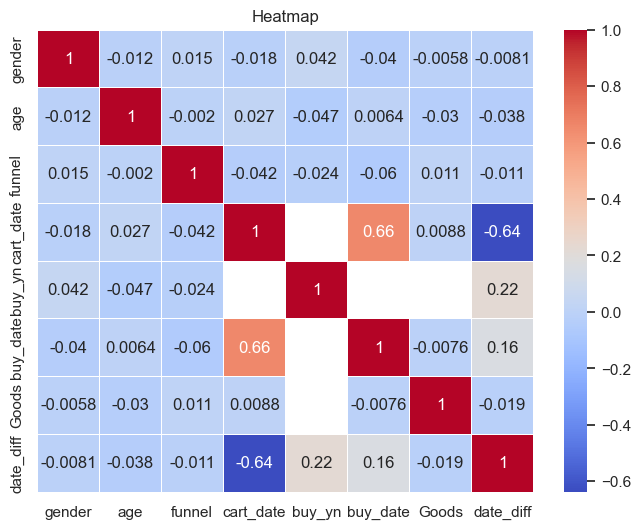

In [149]:
plt.rc('font', family='Malgun Gothic')
# Seaborn을 사용하여 히트맵 그리기
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap")
plt.show()